Test R notebook

- try things with python first and then verify with R?

In [5]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../data/processed/mock_data/reshare_rates.csv")
head(data)

,PROLIFIC_ID,STUDY_ID,SESSION_ID,age,educationLevel,politicalAffiliation,attendsProtests,gender_female,gender_intersex,gender_male,⋯,socialMedias_tiktok,socialMedias_twitter,PROLIFIC_ID.1,treatment,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,79,146,NA,right,0,0,0,1,⋯,0,1,1,Treatment,High,0.8000000,0.50,0.0,0.5000000,0.80
2,1,1,79,146,NA,right,0,0,0,1,⋯,0,1,1,Treatment,Low,0.2500000,1.00,0.0,0.3333333,0.25
3,2,1,28,100,NA,centreRight,0,1,0,0,⋯,0,1,2,Treatment,High,0.3333333,0.75,0.0,0.0000000,0.25
4,2,1,28,100,NA,centreRight,0,1,0,0,⋯,0,1,2,Treatment,Low,0.0000000,1.00,1.0,0.0000000,0.00
5,3,1,32,64,communityCollege,centreLeft,1,0,1,1,⋯,0,1,3,Treatment,High,0.5000000,0.00,0.0,1.0000000,1.00
6,3,1,32,64,communityCollege,centreLeft,1,0,1,1,⋯,0,1,3,Treatment,Low,0.0000000,0.50,0.5,1.0000000,0.00


In [6]:
aov1 <- aov(Affirms ~ treatment * evidence + (1 | PROLIFIC_ID), data=data)
summary(aov1)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
treatment            1   0.00   0.002   0.019    0.891    
evidence             1   8.57   8.571 100.004  < 2e-16 ***
treatment:evidence   1   2.61   2.612  30.478 4.59e-08 ***
Residuals          786  67.36   0.086                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [12]:
model.tables(aov1, type = "means")

Tables of means
Grand mean
          
0.4918214 

 treatment 
     Control Treatment
      0.4904    0.4932
rep 386.0000  404.0000

 evidence 
       High      Low
      0.596   0.3877
rep 395.000 395.0000

 treatment:evidence 
           evidence
treatment   High   Low   
  Control     0.54   0.45
  rep       193.00 193.00
  Treatment   0.65   0.33
  rep       202.00 202.00

In [8]:
md <- lmer(Affirms ~ treatment * evidence + (1 | PROLIFIC_ID), data = data)
summary(md)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ treatment * evidence + (1 | PROLIFIC_ID)
   Data: data

REML criterion at convergence: 319.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2535 -0.6316 -0.0172  0.6759  2.2962 

Random effects:
 Groups      Name        Variance Std.Dev.
 PROLIFIC_ID (Intercept) 0.004761 0.0690  
 Residual                0.080942 0.2845  
Number of obs: 790, groups:  PROLIFIC_ID, 395

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.53570    0.02107  25.421
treatmentTreatment              0.11788    0.02947   4.000
evidenceLow                    -0.09066    0.02896  -3.130
treatmentTreatment:evidenceLow -0.23006    0.04050  -5.681

Correlation of Fixed Effects:
            (Intr) trtmnT evdncL
trtmntTrtmn -0.715              
evidenceLow -0.687  0.491       
trtmntTrt:L  0.491 -0.687 -0.715

In [6]:
confint(md)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.11555200
.sigma,0.26508608,0.30433205
(Intercept),0.49444858,0.57694298
treatmentTreatment,0.06020259,0.17556049
evidenceLow,-0.14742096,-0.03390563
treatmentTreatment:evidenceLow,-0.30943231,-0.15069560


lattice theme set by effectsTheme()
See ?effectsTheme for details.



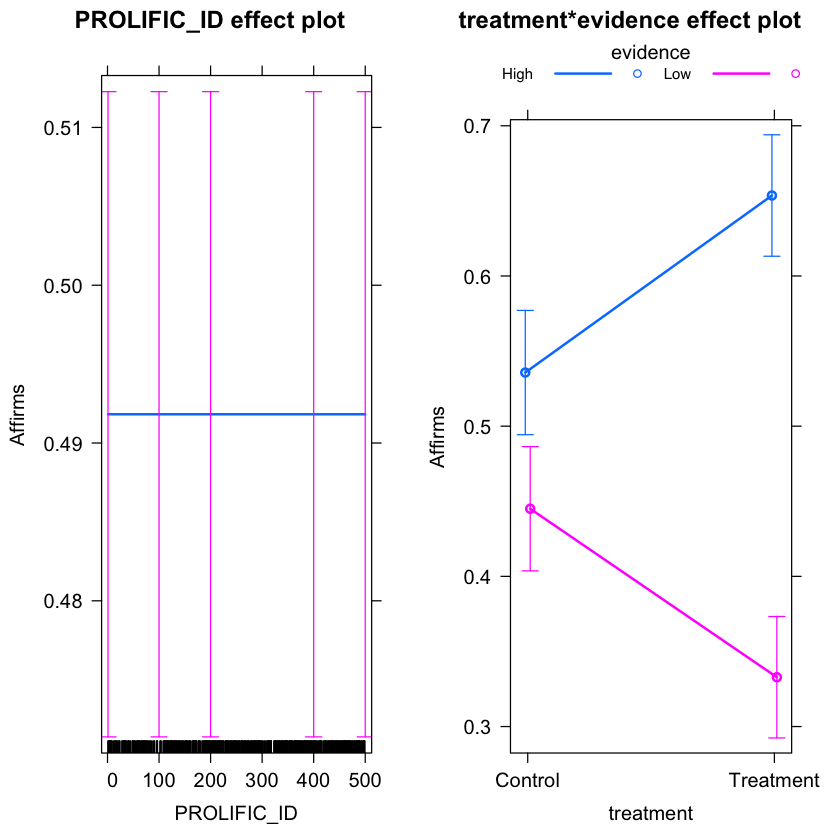

In [9]:
library(effects)
plot(allEffects(aov1), multiline=TRUE, ci.style="bars")